In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy

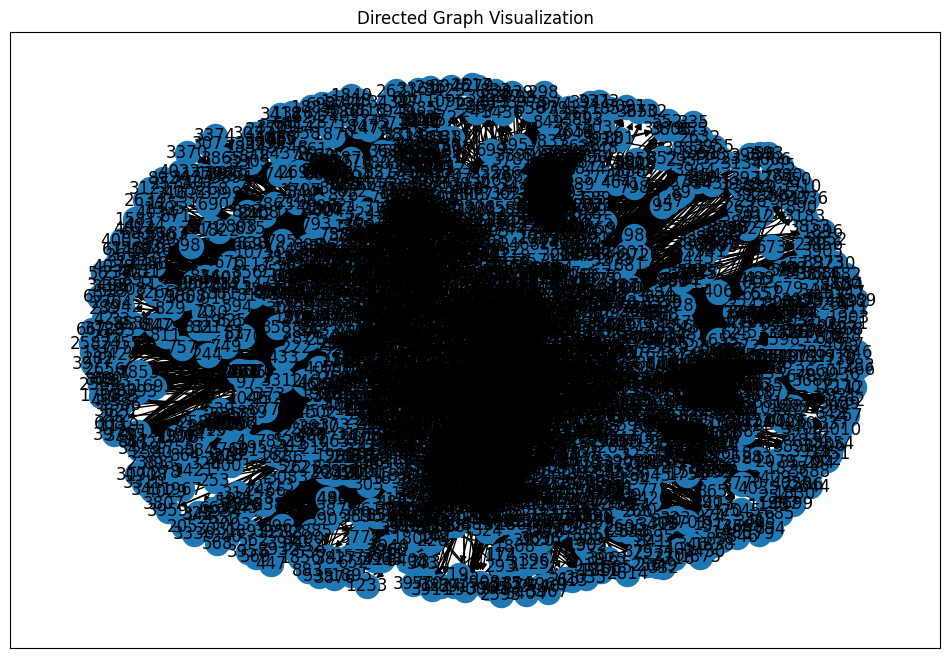

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy

directed_graph = nx.DiGraph()
with open('/content/connections.txt', 'r') as data_file:
    for record in data_file:
        points = record.strip().split()
        directed_graph.add_edge(int(points[0]), int(points[1]))

plt.figure(figsize=(12, 8))
nx.draw_networkx(directed_graph)
plt.title("Directed Graph Visualization")
plt.show()

In [3]:
undirected_graph = directed_graph.to_undirected()

bridges = list(nx.bridges(undirected_graph))
print("Bridges in the graph:", bridges)

Bridges in the graph: [(0, 11), (0, 12), (0, 15), (0, 18), (0, 37), (0, 43), (0, 74), (0, 114), (0, 209), (0, 210), (0, 215), (0, 287), (0, 292), (0, 335), (107, 911), (107, 918), (107, 1096), (107, 1119), (107, 1145), (107, 1206), (107, 1386), (107, 1466), (107, 1560), (107, 1581), (107, 1834), (348, 358), (348, 447), (348, 550), (414, 585), (414, 602), (414, 607), (414, 608), (414, 613), (414, 624), (414, 638), (414, 668), (414, 674), (1684, 2842), (1684, 3031), (1684, 3071), (1684, 3183), (1684, 3230), (1912, 2079), (1912, 2195), (1912, 2269), (1912, 2457), (1912, 2470), (1912, 2569), (1912, 2596), (3437, 3451), (3437, 3453), (3437, 3570), (3437, 3650), (3437, 3709), (3437, 3729), (3437, 3748), (3437, 3798), (3437, 3820), (3437, 3853), (3437, 3856), (3437, 3935), (3437, 3974), (3980, 3984), (3980, 4008), (3980, 4010), (3980, 4015), (3980, 4022), (3980, 4024), (3980, 4035), (686, 692), (686, 801), (698, 875), (698, 883), (698, 891), (698, 892)]


In [4]:
density = nx.density(directed_graph)
print("Density of the graph:", density)

Density of the graph: 0.0054099817517196435


In [5]:
degrees = directed_graph.degree()

sorted_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)

print("Node with highest number of connections:", sorted_degrees[0])
print("Node with lowest number of connections:", sorted_degrees[-1])

Node with highest number of connections: (107, 1045)
Node with lowest number of connections: (4035, 1)


In [6]:
in_degrees = directed_graph.in_degree()
highest_in_degree = max(in_degrees, key=lambda x: x[1])

out_degrees = directed_graph.out_degree()
highest_out_degree = max(out_degrees, key=lambda x: x[1])

print("Node with highest incoming connections:", highest_in_degree)
print("Node with highest outgoing connections:", highest_out_degree)

Node with highest incoming connections: (1888, 251)
Node with highest outgoing connections: (107, 1043)


In [7]:
closeness_centrality = nx.closeness_centrality(directed_graph)
node_with_highest_closeness = max(closeness_centrality, key=closeness_centrality.get)
print("Node with highest closeness centrality:", node_with_highest_closeness)

betweenness_centrality = nx.betweenness_centrality(directed_graph)
node_with_highest_betweenness = max(betweenness_centrality, key=betweenness_centrality.get)
print("Node with highest betweenness centrality:", node_with_highest_betweenness)

eigenvector_centrality = nx.eigenvector_centrality_numpy(directed_graph, max_iter=1000, tol=1e-03)
node_with_highest_eigenvector = max(eigenvector_centrality, key=eigenvector_centrality.get)
print("Node with highest eigenvector centrality:", node_with_highest_eigenvector)

Node with highest closeness centrality: 2642
Node with highest betweenness centrality: 1684
Node with highest eigenvector centrality: 2655


In [31]:
pip install python-louvain==0.15


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.15-py3-none-any.whl size=9396 sha256=86f390984ad41ad59e243088b4620b71ead2ac543580767ff7142d3b5d9052bf
  Stored in directory: /root/.cache/pip/wheels/73/99/50/8dd2ba8bc9d968b50e021fe35b15b1ff23e8df38ff4d9f559d
Successfully built python-louvain
  Attempting uninstall: python-louvain
    Found existing installation: python-louvain 0.16
    Uninstalling python-louvain-0.16:
      Successfully uninstalled python-louvain-0.16


In [8]:
import community as community_louvain


undirected_graph = directed_graph.to_undirected()

community_partition = community_louvain.best_partition(undirected_graph)
total_communities = len(set(community_partition.values()))

print("Number of communities detected:", total_communities)

Number of communities detected: 16


In [9]:
from collections import Counter


community_node_counts = Counter(community_partition.values())

community_with_most_nodes = max(community_node_counts, key=community_node_counts.get)
community_with_least_nodes = min(community_node_counts, key=community_node_counts.get)

print("Largest community:", community_with_most_nodes, "with", community_node_counts[community_with_most_nodes], "nodes")
print("Smallest community:", community_with_least_nodes, "with", community_node_counts[community_with_least_nodes], "nodes")

Largest community: 8 with 548 nodes
Smallest community: 2 with 19 nodes


Largest Cluster (Community 9 with 548 nodes): This constitutes a prominent collective, likely signifying the central network of interconnected individuals or entities. Focusing on this community for marketing purposes could result in extensive reach and influence due to its substantial size.

Smallest Group (Community 3 with 19 nodes): As a compact and more close-knit assembly, this community may represent a distinct niche. Crafting marketing strategies here can be highly personalized and precise, potentially leading to robust engagement within this smaller, potentially more unified group.

The contrast in community sizes suggests a need for diverse marketing approaches: broad campaigns for the larger cluster and more precise, specialized efforts for the smaller one.

Largest three communities: [8, 4, 7]


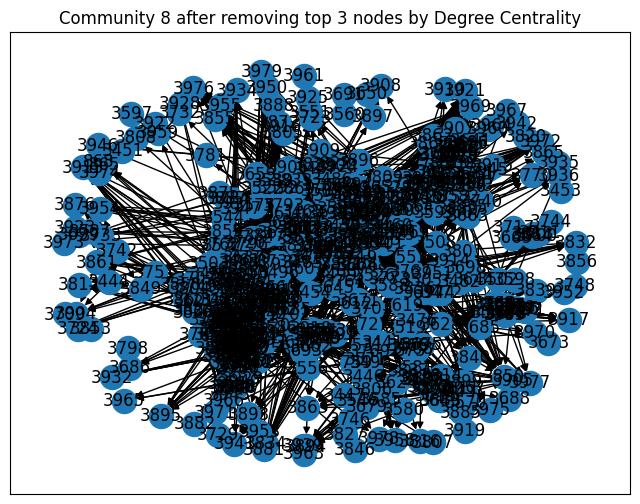

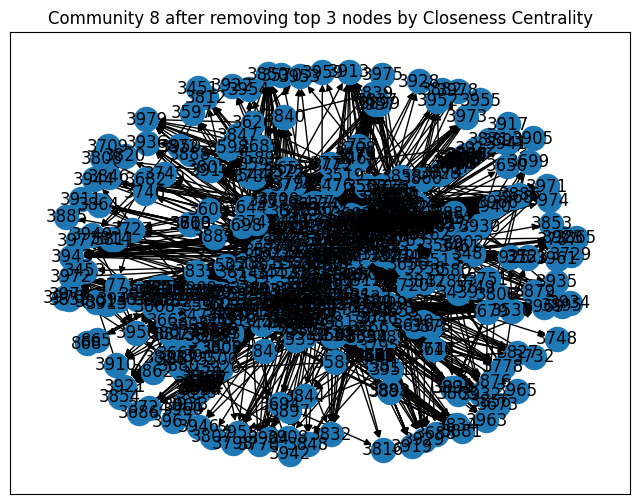

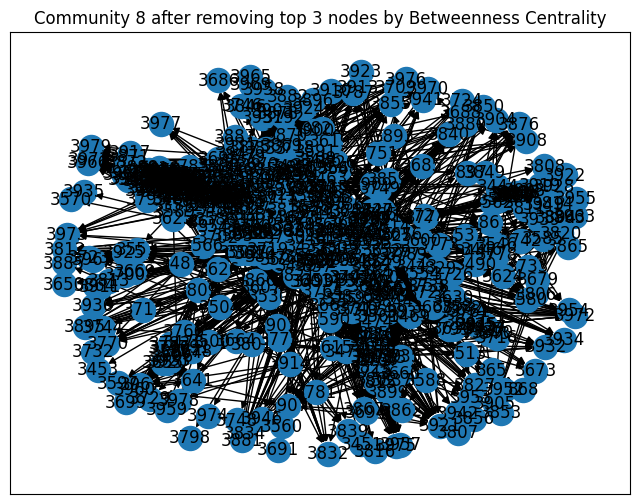

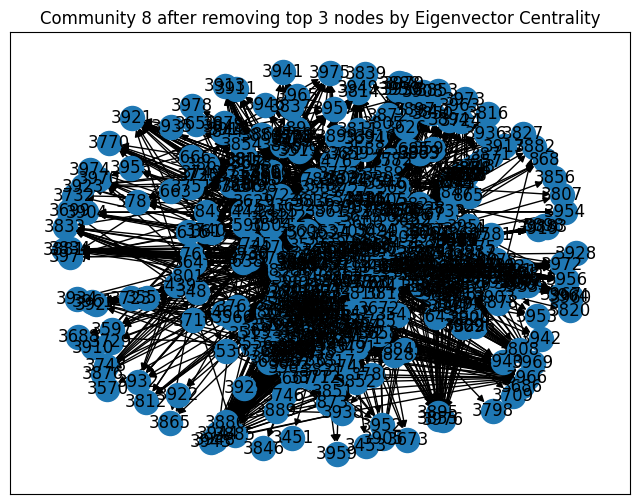

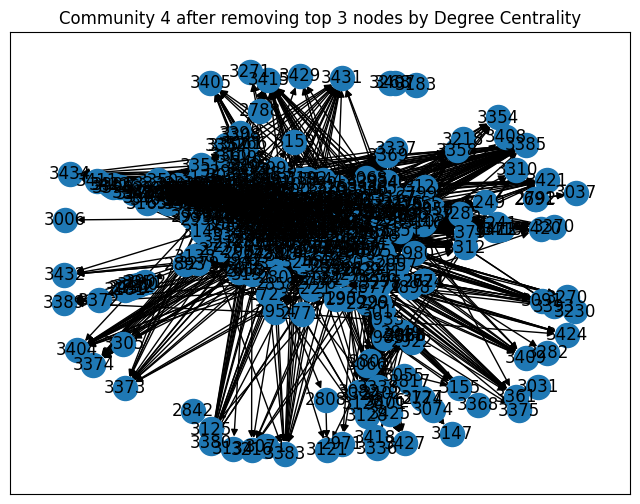

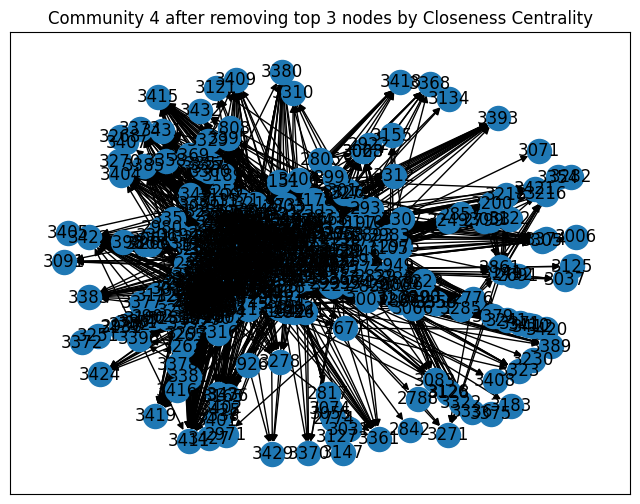

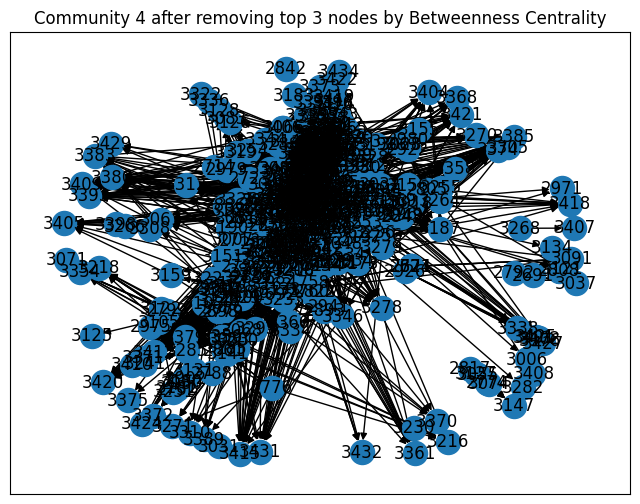

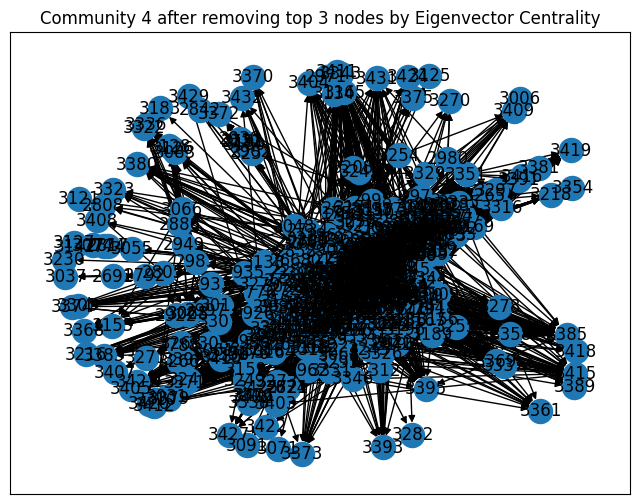

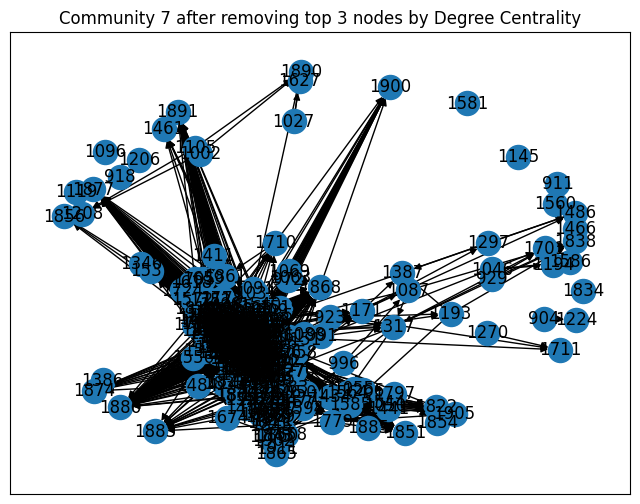

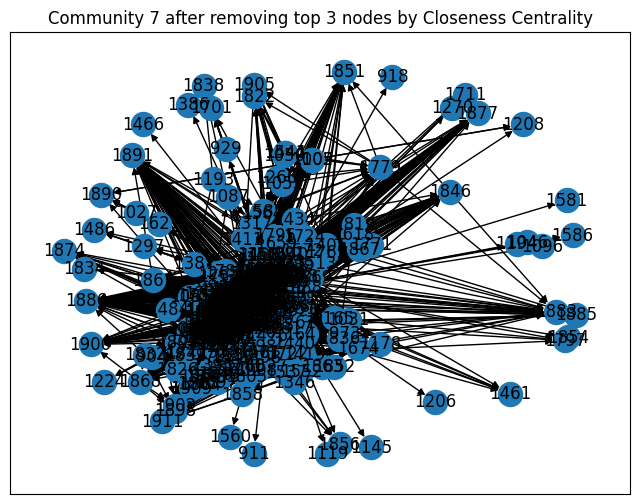

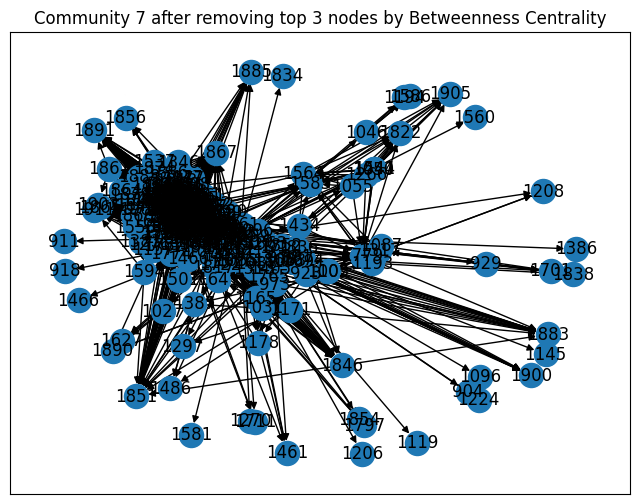

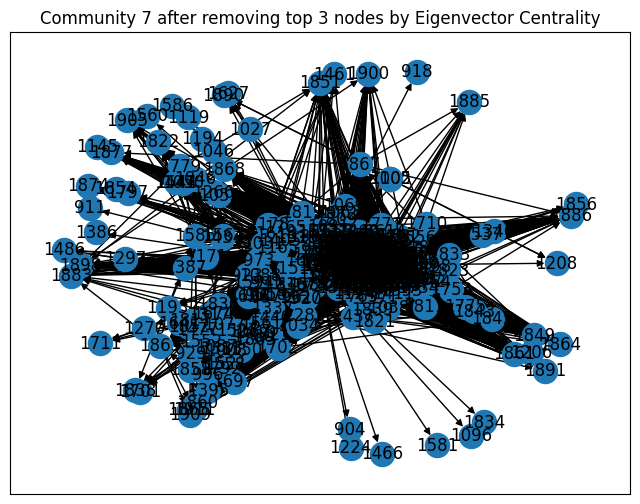

In [10]:
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt


community_sizes = Counter(community_partition.values())
largest_three_communities = [community[0] for community in community_sizes.most_common(3)]
print("Largest three communities:", largest_three_communities)

def remove_top_3_nodes(subgraph, centrality_measure):
    top_3_nodes = sorted(centrality_measure, key=centrality_measure.get, reverse=True)[:3]
    modified_subgraph = subgraph.copy()
    modified_subgraph.remove_nodes_from(top_3_nodes)
    return modified_subgraph

def plot_community_graph(community_graph, community_id, centrality_type):
    plt.figure(figsize=(8, 6))
    nx.draw_networkx(community_graph, with_labels=True)
    plt.title(f"Community {community_id} after removing top 3 nodes by {centrality_type} Centrality")
    plt.show()

for community_id in largest_three_communities:
    community_nodes = [node for node, com in community_partition.items() if com == community_id]
    community_subgraph = directed_graph.subgraph(community_nodes)

    centrality_measures = {
        'Degree': nx.degree_centrality(community_subgraph),
        'Closeness': nx.closeness_centrality(community_subgraph),
        'Betweenness': nx.betweenness_centrality(community_subgraph),
        'Eigenvector': nx.eigenvector_centrality_numpy(community_subgraph, max_iter=1000, tol=1e-03)
    }

    for centrality_type, centrality_data in centrality_measures.items():
        modified_graph = remove_top_3_nodes(community_subgraph, centrality_data)
        plot_community_graph(modified_graph, community_id, centrality_type)

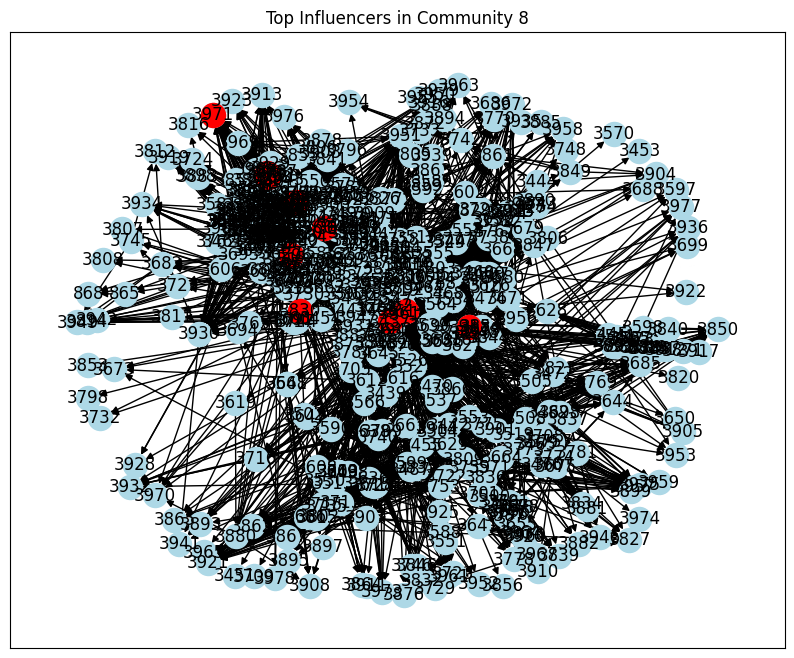

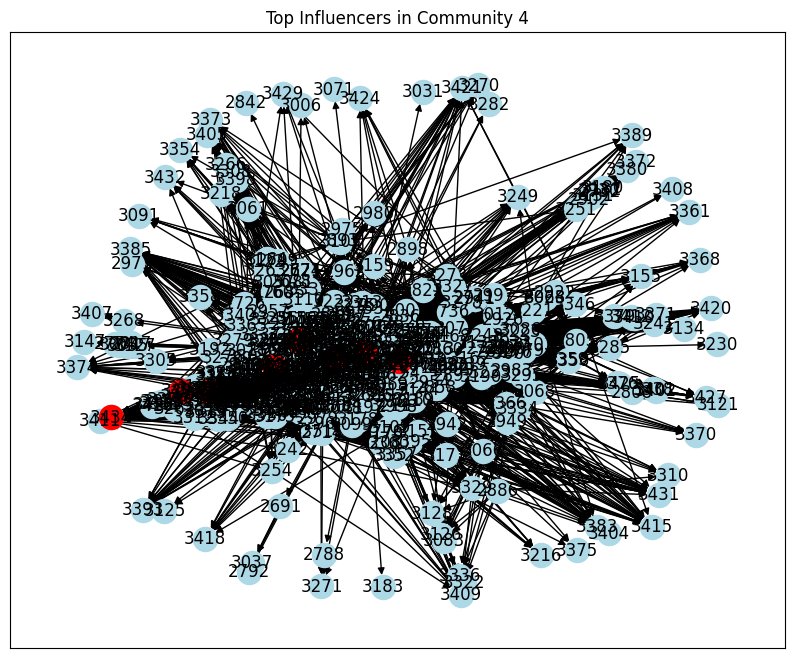

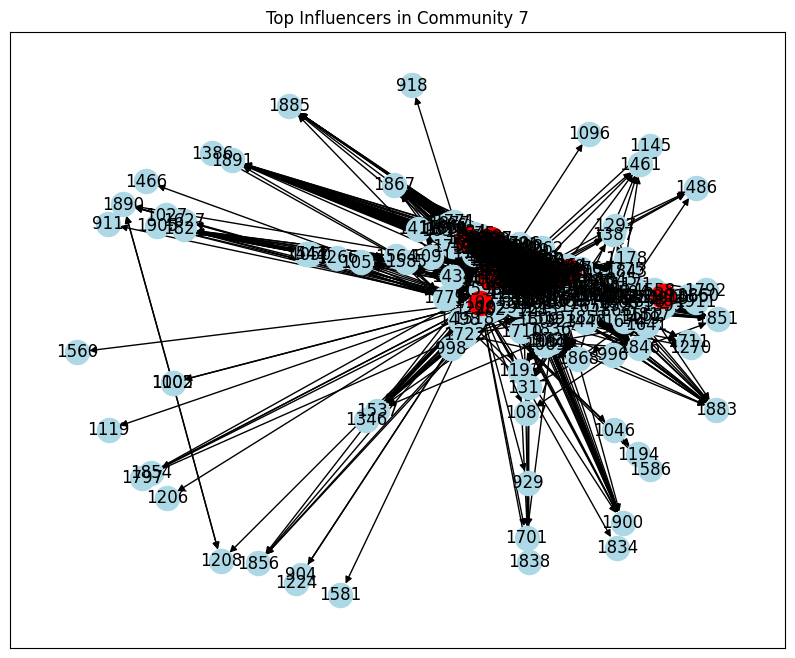

In [11]:
def find_top_influencers(graph, centrality_function, num_top=3, **kwargs):
    centrality_scores = centrality_function(graph, **kwargs)
    return sorted(centrality_scores, key=centrality_scores.get, reverse=True)[:num_top]

def visualize_influencers(subgraph, influencers, community_id):
    plt.figure(figsize=(10, 8))
    layout = nx.spring_layout(subgraph)
    nx.draw_networkx(subgraph, layout, with_labels=True, node_color='lightblue')
    nx.draw_networkx_nodes(subgraph, layout, nodelist=influencers, node_color='red')
    plt.title(f"Top Influencers in Community {community_id}")
    plt.show()

for community_id in largest_three_communities:
    community_nodes = [node for node, com in community_partition.items() if com == community_id]
    community_subgraph = directed_graph.subgraph(community_nodes)

    top_influencers_by_centrality = {
        'Degree': find_top_influencers(community_subgraph, nx.degree_centrality),
        'Closeness': find_top_influencers(community_subgraph, nx.closeness_centrality),
        'Betweenness': find_top_influencers(community_subgraph, nx.betweenness_centrality),
        'Eigenvector': find_top_influencers(community_subgraph, nx.eigenvector_centrality_numpy, max_iter=1000, tol=1e-03)
    }

    combined_top_influencers = set().union(*top_influencers_by_centrality.values())

    visualize_influencers(community_subgraph, combined_top_influencers, community_id)

Hypothetical Scenario: Telecom Company

a. Business Context
Company: NextGen Telecom
Industry: Telecommunications
Services: Mobile and Internet Connectivity

b. Marketing Budget
Total Marketing Budget: $100,000
Duration: Q1 2024

c. Cost Per Action (CPA)
Advertisement Cost: $10 per action
Actions can include clicks on online ads, calling for inquiries, or signing up for newsletters.
The budget allows for 10,000 actions ($100,000 / $10 per action).

d. Target Audience Identification Using Network Analysis

Step 1: Data Collection

Collect data on customer interactions, social media connections, and service usage patterns.
Build a directed graph representing the customer network, where nodes are customers and edges represent interactions (calls, texts, online engagement).

Step 2: Network Analysis

Use centrality measures to identify key individuals in the network.
Degree Centrality: Find customers with the most connections (indicative of high social influence).
Betweenness Centrality: Identify customers who act as bridges in the network (connecting different groups).
Eigenvector Centrality: Focus on customers connected to other influential customers.
Community Detection: Segment the network into communities (groups with frequent interactions).

Step 3: Strategy Development

Identify Top Influencers: Use network analysis to find top influencers in each community or centrality category.
Customize Messaging: Tailor marketing messages based on community characteristics and influencers' preferences.
Exclusive Offers for Influencers: Provide special deals or incentives to these influencers to encourage them to spread the word about NextGen Telecom's services.
Summary
This plan is designed to tactically engage both influential individuals and specific communities within the network, aiming to broaden the client base and solidify the agency’s standing in the digital marketing landscape. By implementing a dual approach that combines broad-scale digital outreach with more personalized marketing initiatives, the strategy aims to capture a diverse array of clients, ranging from the general market to niche segments.